In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

#returns model prediction score for a single image
def prepare(filepath):
    IMG_SIZE = 120
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

def get_prediction(filepath, model):
    tester = prepare(filepath)
    tester = tester.astype(np.float32)/255
    return(float(model.predict([tester])))

# gets class based on threshold score
def verify(score, threshold):
    if score >= threshold:
        return('with_mask')
    else:
        return('without_mask')
    
# gets classed based on model prediction
def get_class(filepath, model):
    tester = prepare(filepath)
    tester = tester.astype(np.float32)/255
    return(float(model.predict_classes([tester])))
    
def predict_and_show(filepath, model, threshold):
    img = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.show()
    print(verify(get_prediction(filepath, model), threshold))
    print('score = ' + str(get_prediction(filepath, model)))

c:\users\olfoa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


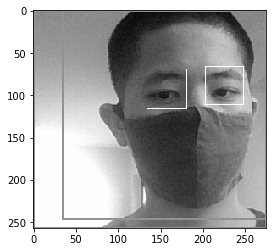

with_mask
score = 0.4741961658000946
opencv_frame_0.jpg


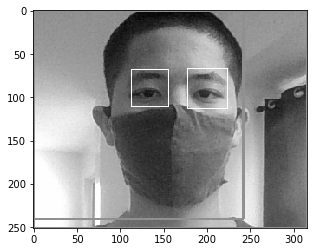

with_mask
score = 0.6985977292060852
opencv_frame_1.jpg


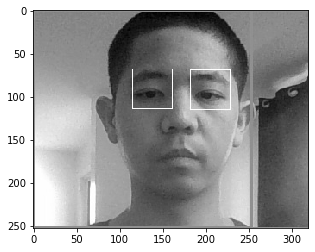

without_mask
score = 0.03693492338061333
opencv_frame_2.jpg


In [ ]:
#live prediction with eye detection
#haarcascade_lefteye_2splits is best
# this is the best version
threshold = 0.3
model = tf.keras.models.load_model('2020-06-14-1833-Conv2D.model')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier("haarcascade_lefteye_2splits.xml")

def show(filepath):
    img = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.show()

cap = cv2.VideoCapture(0)
img_counter = 0
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (int(x), int(y)), (x+int(w), y+int(h)), (255,255,255), 1) #eye detection
        img_name = "frame_{}.jpg".format(img_counter)
        cv2.rectangle(img,(int(0.5*x), int(0.25*y)), (x+int(3*w),y+int(4*h)), (0,255,0), 2) #draw image detection rectange
        
        
    #annotation
        face_frame =  img[int(0.25*y):y+int(4*h),int(0.5*x):x+int(3*w)]
    cv2.imwrite(img_name, face_frame)
    annotation_text = verify(get_prediction(img_name, model), 0.25) + '//' + 'score = ' + str(get_prediction(img_name, model))[0:3] + str(get_prediction(img_name, model))[-4:]
    cv2.putText(img, annotation_text, (200, 400),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)
    os.remove(img_name)
    #annotation
    
    cv2.imshow('img', img)
    k = cv2.waitKey(30) &0xff #escape key to get out

    if k==27:
        break

    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.jpg".format(img_counter)
        if faces !=():
            face_frame =  img[int(0.25*y):y+int(4*h),int(0.5*x):x+int(3*w)]
            cv2.imwrite(img_name, face_frame)
            img_counter += 1
            predict_and_show(img_name, model, threshold)
            print(img_name)
        else:
            print('no face detected')
        
        #print("{} written!".format(img_name))
        
cap.release()
cv2.destroyAllWindows()
